In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.9.6
Using MPI version 3.1, 1 processes


In [2]:
sx=10
sy=10
sz=10
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 500
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                    )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(-0.5*sx+1 , 0), 
                     size=mp.Vector3(0, sy)
                    )
          ]

-----------
Initializing structure...
time for choose_chunkdivision = 0.008569 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 500
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
subpixel-averaging is 28.4554% done, 10.058 s remaining
subpixel-averaging is 56.9068% done, 3.02931 s remaining
subpixel-averaging is 85.3982% done, 0.683988 s remaining
subpixel-averaging is 28.4074% done, 10.0818 s remaining
subpixel-averaging is 56.8427% done, 3.03733 s remaining
subpixel-averaging is 85.2381% done, 0.692764 s remaining
subpixel-averaging is 28.3753% done, 10.097 s remaining
subpixel-averaging is 56.7627% done, 3.04716 s remaining
subpixel-averaging is 84.946% done, 0.708958 s remaining
time for set_epsilon = 52.2962 s
-----------


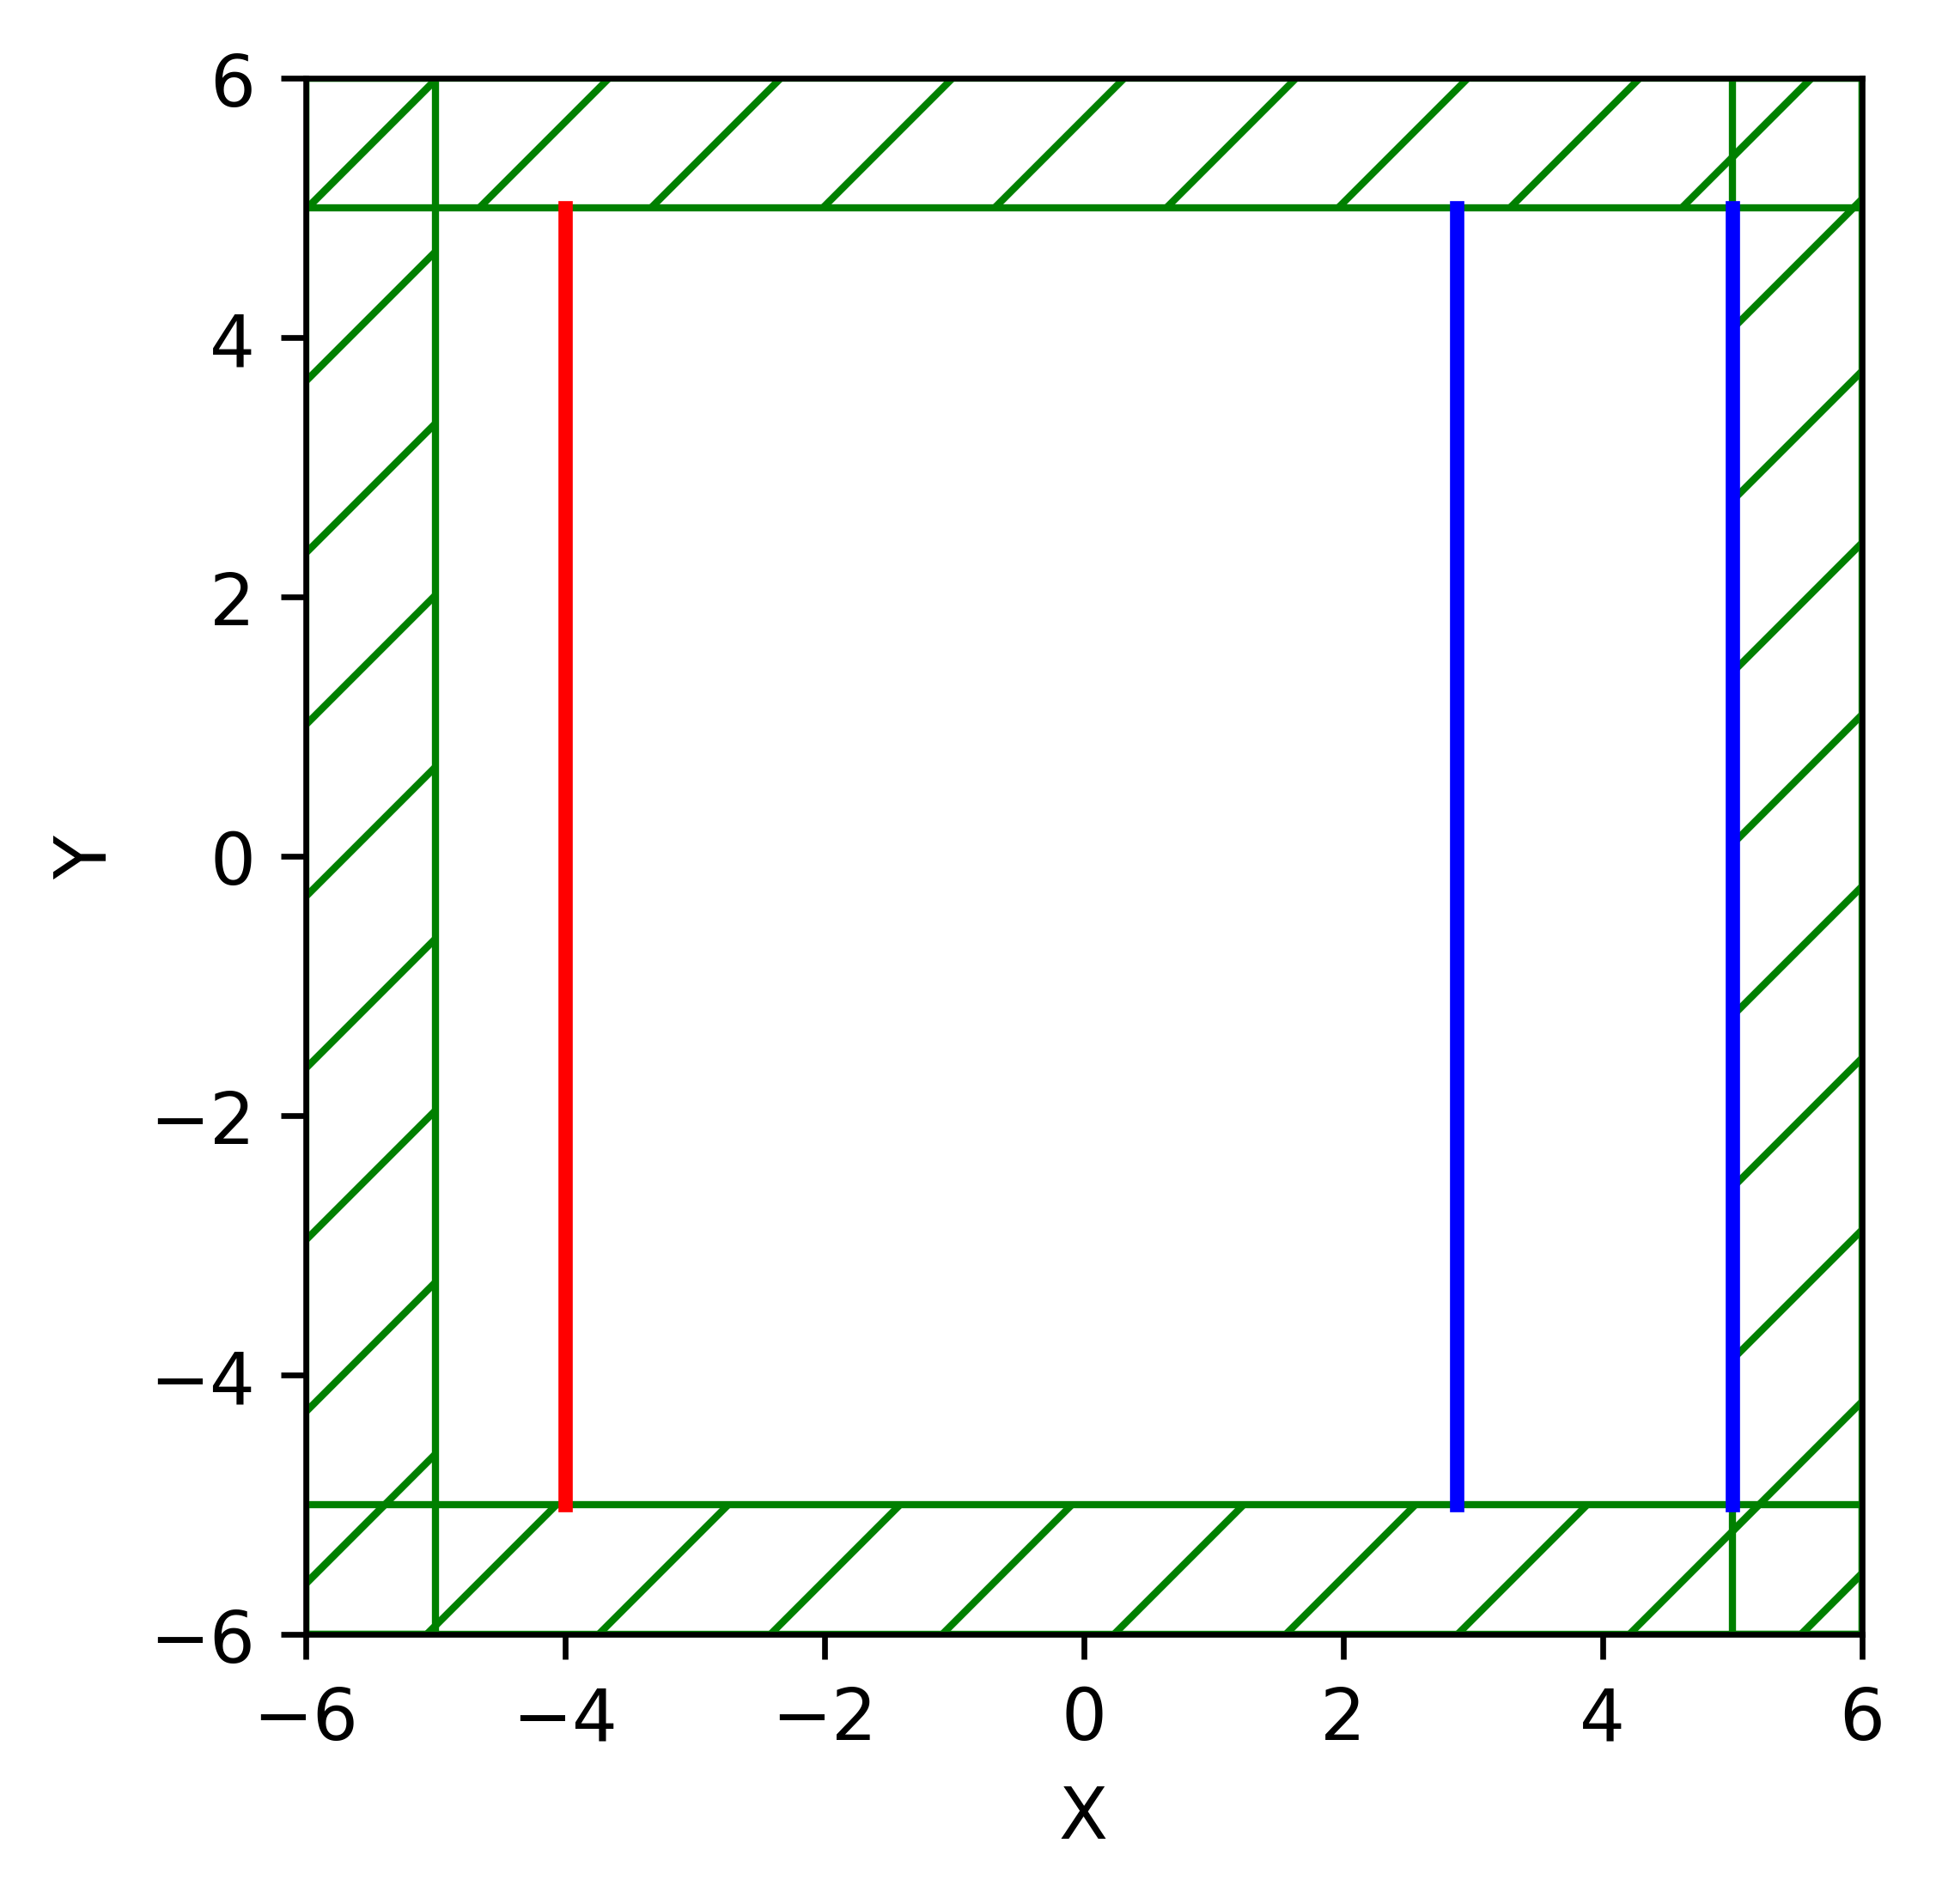

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.2*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                         )

refl_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                     )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                         )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                     )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [ ]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

creating output file "./eps-000000000.h5"...
on time step 8 (time=0.008), 0.504965 s/step
on time step 23 (time=0.023), 0.270249 s/step
on time step 38 (time=0.038), 0.269462 s/step
on time step 53 (time=0.053), 0.269571 s/step
on time step 68 (time=0.068), 0.270166 s/step
on time step 83 (time=0.083), 0.269881 s/step
on time step 98 (time=0.098), 0.26954 s/step
on time step 113 (time=0.113), 0.270679 s/step
on time step 128 (time=0.128), 0.272016 s/step
on time step 144 (time=0.144), 0.264436 s/step
on time step 160 (time=0.16), 0.263183 s/step
on time step 176 (time=0.176), 0.262517 s/step
on time step 192 (time=0.192), 0.26262 s/step
on time step 208 (time=0.208), 0.263427 s/step
on time step 224 (time=0.224), 0.262667 s/step
on time step 240 (time=0.24), 0.262254 s/step
on time step 255 (time=0.255), 0.268769 s/step
on time step 271 (time=0.271), 0.261964 s/step
on time step 287 (time=0.287), 0.262265 s/step
on time step 303 (time=0.303), 0.26202 s/step
on time step 319 (time=0.319

on time step 2607 (time=2.607), 0.271095 s/step
on time step 2622 (time=2.622), 0.272657 s/step
on time step 2637 (time=2.637), 0.270375 s/step
on time step 2652 (time=2.652), 0.270429 s/step
on time step 2667 (time=2.667), 0.27115 s/step
on time step 2682 (time=2.682), 0.276465 s/step
on time step 2697 (time=2.697), 0.270387 s/step
on time step 2712 (time=2.712), 0.271524 s/step
on time step 2727 (time=2.727), 0.271018 s/step
on time step 2742 (time=2.742), 0.271033 s/step
on time step 2757 (time=2.757), 0.270718 s/step
on time step 2772 (time=2.772), 0.270999 s/step
on time step 2787 (time=2.787), 0.271403 s/step
on time step 2802 (time=2.802), 0.271418 s/step
on time step 2817 (time=2.817), 0.27088 s/step
on time step 2832 (time=2.832), 0.271462 s/step
on time step 2847 (time=2.847), 0.273147 s/step
on time step 2862 (time=2.862), 0.270767 s/step
on time step 2877 (time=2.877), 0.273615 s/step
on time step 2892 (time=2.892), 0.275317 s/step
on time step 2907 (time=2.907), 0.27096 s/

on time step 5187 (time=5.187), 0.27326 s/step
on time step 5202 (time=5.202), 0.273042 s/step
on time step 5217 (time=5.217), 0.273406 s/step
on time step 5232 (time=5.232), 0.273612 s/step
on time step 5247 (time=5.247), 0.273919 s/step
on time step 5262 (time=5.262), 0.273676 s/step
on time step 5277 (time=5.277), 0.273137 s/step
on time step 5292 (time=5.292), 0.27401 s/step
on time step 5307 (time=5.307), 0.273008 s/step
on time step 5322 (time=5.322), 0.273907 s/step
on time step 5337 (time=5.337), 0.275429 s/step
on time step 5352 (time=5.352), 0.273977 s/step
on time step 5367 (time=5.367), 0.273917 s/step
on time step 5382 (time=5.382), 0.272869 s/step
on time step 5397 (time=5.397), 0.273893 s/step
on time step 5412 (time=5.412), 0.277811 s/step
on time step 5427 (time=5.427), 0.275328 s/step
on time step 5442 (time=5.442), 0.274943 s/step
on time step 5457 (time=5.457), 0.273582 s/step
on time step 5472 (time=5.472), 0.27347 s/step
on time step 5487 (time=5.487), 0.273566 s/

on time step 7571 (time=7.571), 0.988143 s/step
on time step 7576 (time=7.576), 0.996866 s/step
on time step 7581 (time=7.581), 0.896124 s/step
on time step 7588 (time=7.588), 0.626755 s/step
on time step 7601 (time=7.601), 0.31626 s/step
on time step 7615 (time=7.615), 0.302915 s/step
on time step 7629 (time=7.629), 0.303046 s/step
on time step 7643 (time=7.643), 0.30374 s/step
on time step 7657 (time=7.657), 0.306724 s/step
on time step 7671 (time=7.671), 0.303236 s/step
on time step 7685 (time=7.685), 0.303635 s/step
on time step 7699 (time=7.699), 0.303834 s/step
on time step 7713 (time=7.713), 0.304008 s/step
on time step 7727 (time=7.727), 0.303417 s/step
on time step 7741 (time=7.741), 0.303689 s/step
on time step 7755 (time=7.755), 0.304871 s/step
on time step 7769 (time=7.769), 0.303264 s/step
on time step 7783 (time=7.783), 0.304738 s/step
on time step 7797 (time=7.797), 0.302832 s/step
on time step 7811 (time=7.811), 0.302987 s/step
on time step 7825 (time=7.825), 0.30345 s/

on time step 10161 (time=10.161), 0.261642 s/step
on time step 10177 (time=10.177), 0.261812 s/step
on time step 10193 (time=10.193), 0.261827 s/step
on time step 10209 (time=10.209), 0.261703 s/step
on time step 10225 (time=10.225), 0.261472 s/step
on time step 10241 (time=10.241), 0.261494 s/step
on time step 10257 (time=10.257), 0.261409 s/step
on time step 10273 (time=10.273), 0.26163 s/step
on time step 10289 (time=10.289), 0.261396 s/step
on time step 10305 (time=10.305), 0.261419 s/step
on time step 10321 (time=10.321), 0.261253 s/step
on time step 10337 (time=10.337), 0.261395 s/step
on time step 10353 (time=10.353), 0.261471 s/step
on time step 10369 (time=10.369), 0.261437 s/step
on time step 10385 (time=10.385), 0.261557 s/step
on time step 10401 (time=10.401), 0.261577 s/step
on time step 10417 (time=10.417), 0.2616 s/step
on time step 10433 (time=10.433), 0.262112 s/step
on time step 10449 (time=10.449), 0.261827 s/step
on time step 10465 (time=10.465), 0.261403 s/step
on 

on time step 12799 (time=12.799), 0.263309 s/step
on time step 12815 (time=12.815), 0.261305 s/step
on time step 12831 (time=12.831), 0.260823 s/step
on time step 12847 (time=12.847), 0.260821 s/step
on time step 12863 (time=12.863), 0.265458 s/step
on time step 12879 (time=12.879), 0.261043 s/step
on time step 12894 (time=12.894), 0.267091 s/step
on time step 12910 (time=12.91), 0.26248 s/step
on time step 12926 (time=12.926), 0.260806 s/step
on time step 12942 (time=12.942), 0.262012 s/step
on time step 12958 (time=12.958), 0.263179 s/step
on time step 12974 (time=12.974), 0.261103 s/step
on time step 12990 (time=12.99), 0.262039 s/step
on time step 13006 (time=13.006), 0.263053 s/step
on time step 13022 (time=13.022), 0.260985 s/step
on time step 13038 (time=13.038), 0.262336 s/step
on time step 13054 (time=13.054), 0.262718 s/step
on time step 13070 (time=13.07), 0.260873 s/step
on time step 13086 (time=13.086), 0.260831 s/step
on time step 13102 (time=13.102), 0.260854 s/step
on t

on time step 15462 (time=15.462), 0.264197 s/step
on time step 15478 (time=15.478), 0.262325 s/step
on time step 15494 (time=15.494), 0.262973 s/step
on time step 15510 (time=15.51), 0.262239 s/step
on time step 15526 (time=15.526), 0.262401 s/step
on time step 15542 (time=15.542), 0.262502 s/step
on time step 15558 (time=15.558), 0.26205 s/step
on time step 15574 (time=15.574), 0.261849 s/step
on time step 15590 (time=15.59), 0.262093 s/step
on time step 15606 (time=15.606), 0.261925 s/step
on time step 15622 (time=15.622), 0.262122 s/step
on time step 15638 (time=15.638), 0.262954 s/step
on time step 15654 (time=15.654), 0.261993 s/step
on time step 15670 (time=15.67), 0.263714 s/step
on time step 15686 (time=15.686), 0.262429 s/step
on time step 15702 (time=15.702), 0.262606 s/step
on time step 15718 (time=15.718), 0.262265 s/step
on time step 15734 (time=15.734), 0.263853 s/step
on time step 15749 (time=15.749), 0.268511 s/step
on time step 15765 (time=15.765), 0.262431 s/step
on t

on time step 18098 (time=18.098), 0.26206 s/step
on time step 18114 (time=18.114), 0.261989 s/step
on time step 18130 (time=18.13), 0.261965 s/step
on time step 18146 (time=18.146), 0.265784 s/step
on time step 18162 (time=18.162), 0.262861 s/step
on time step 18177 (time=18.177), 0.267345 s/step
on time step 18193 (time=18.193), 0.265768 s/step
on time step 18209 (time=18.209), 0.263002 s/step
on time step 18225 (time=18.225), 0.264535 s/step
on time step 18241 (time=18.241), 0.265151 s/step
on time step 18257 (time=18.257), 0.265779 s/step
on time step 18273 (time=18.273), 0.265501 s/step
on time step 18289 (time=18.289), 0.26327 s/step
on time step 18305 (time=18.305), 0.26426 s/step
on time step 18321 (time=18.321), 0.264054 s/step
on time step 18337 (time=18.337), 0.264822 s/step
on time step 18353 (time=18.353), 0.262881 s/step
on time step 18368 (time=18.368), 0.266915 s/step
on time step 18384 (time=18.384), 0.265554 s/step
on time step 18400 (time=18.4), 0.265235 s/step
on tim

on time step 20739 (time=20.739), 0.263137 s/step
on time step 20755 (time=20.755), 0.266271 s/step
on time step 20771 (time=20.771), 0.262936 s/step
on time step 20787 (time=20.787), 0.263277 s/step
on time step 20803 (time=20.803), 0.263071 s/step
on time step 20819 (time=20.819), 0.26311 s/step
on time step 20835 (time=20.835), 0.263345 s/step
on time step 20851 (time=20.851), 0.26307 s/step
on time step 20867 (time=20.867), 0.264869 s/step
on time step 20883 (time=20.883), 0.263028 s/step
on time step 20898 (time=20.898), 0.268299 s/step
on time step 20913 (time=20.913), 0.270647 s/step
on time step 20928 (time=20.928), 0.269722 s/step
on time step 20944 (time=20.944), 0.263312 s/step
on time step 20960 (time=20.96), 0.264534 s/step
on time step 20976 (time=20.976), 0.263029 s/step
on time step 20991 (time=20.991), 0.266779 s/step
on time step 21006 (time=21.006), 0.26838 s/step
on time step 21022 (time=21.022), 0.263211 s/step
on time step 21038 (time=21.038), 0.262749 s/step
on t

on time step 23377 (time=23.377), 0.267092 s/step
on time step 23393 (time=23.393), 0.263623 s/step
on time step 23409 (time=23.409), 0.262783 s/step
on time step 23425 (time=23.425), 0.262829 s/step
on time step 23441 (time=23.441), 0.262789 s/step
on time step 23457 (time=23.457), 0.263372 s/step
on time step 23473 (time=23.473), 0.262828 s/step
on time step 23489 (time=23.489), 0.263257 s/step
on time step 23504 (time=23.504), 0.270121 s/step
on time step 23519 (time=23.519), 0.269057 s/step
on time step 23535 (time=23.535), 0.26595 s/step
on time step 23551 (time=23.551), 0.263409 s/step
on time step 23566 (time=23.566), 0.275906 s/step
on time step 23582 (time=23.582), 0.264093 s/step
on time step 23598 (time=23.598), 0.263754 s/step
on time step 23614 (time=23.614), 0.263497 s/step
on time step 23629 (time=23.629), 0.268524 s/step
on time step 23645 (time=23.645), 0.263477 s/step
on time step 23661 (time=23.661), 0.263651 s/step
on time step 23677 (time=23.677), 0.263508 s/step
o

on time step 26002 (time=26.002), 0.26317 s/step
on time step 26018 (time=26.018), 0.262884 s/step
on time step 26034 (time=26.034), 0.26315 s/step
on time step 26050 (time=26.05), 0.263599 s/step
on time step 26066 (time=26.066), 0.265837 s/step
on time step 26082 (time=26.082), 0.263453 s/step
on time step 26098 (time=26.098), 0.263697 s/step
on time step 26114 (time=26.114), 0.263553 s/step
on time step 26130 (time=26.13), 0.263029 s/step
on time step 26146 (time=26.146), 0.263069 s/step
on time step 26162 (time=26.162), 0.266291 s/step
on time step 26178 (time=26.178), 0.263157 s/step
on time step 26194 (time=26.194), 0.263513 s/step
on time step 26210 (time=26.21), 0.26324 s/step
on time step 26226 (time=26.226), 0.262936 s/step
on time step 26242 (time=26.242), 0.263119 s/step
on time step 26258 (time=26.258), 0.265384 s/step
on time step 26274 (time=26.274), 0.266097 s/step
on time step 26290 (time=26.29), 0.263665 s/step
on time step 26305 (time=26.305), 0.27247 s/step
on time 

on time step 28627 (time=28.627), 0.261028 s/step
on time step 28643 (time=28.643), 0.261056 s/step
on time step 28659 (time=28.659), 0.261137 s/step
on time step 28675 (time=28.675), 0.260962 s/step
on time step 28691 (time=28.691), 0.261164 s/step
on time step 28707 (time=28.707), 0.261128 s/step
on time step 28723 (time=28.723), 0.261271 s/step
on time step 28739 (time=28.739), 0.261206 s/step
on time step 28755 (time=28.755), 0.261224 s/step
on time step 28771 (time=28.771), 0.261189 s/step
on time step 28787 (time=28.787), 0.260982 s/step
on time step 28803 (time=28.803), 0.261327 s/step
on time step 28819 (time=28.819), 0.261175 s/step
on time step 28835 (time=28.835), 0.261985 s/step
on time step 28851 (time=28.851), 0.26135 s/step
on time step 28867 (time=28.867), 0.261259 s/step
on time step 28883 (time=28.883), 0.261352 s/step
on time step 28899 (time=28.899), 0.261969 s/step
on time step 28915 (time=28.915), 0.261414 s/step
on time step 28931 (time=28.931), 0.264029 s/step
o

on time step 31263 (time=31.263), 0.260798 s/step
on time step 31279 (time=31.279), 0.261052 s/step
on time step 31295 (time=31.295), 0.261279 s/step
on time step 31311 (time=31.311), 0.261147 s/step
on time step 31327 (time=31.327), 0.261012 s/step
on time step 31343 (time=31.343), 0.261239 s/step
on time step 31359 (time=31.359), 0.261715 s/step
on time step 31375 (time=31.375), 0.261872 s/step
on time step 31391 (time=31.391), 0.261802 s/step
on time step 31407 (time=31.407), 0.261549 s/step
on time step 31423 (time=31.423), 0.26385 s/step
on time step 31439 (time=31.439), 0.26114 s/step
on time step 31455 (time=31.455), 0.261928 s/step
on time step 31471 (time=31.471), 0.263739 s/step
on time step 31487 (time=31.487), 0.261915 s/step
on time step 31503 (time=31.503), 0.264088 s/step
on time step 31519 (time=31.519), 0.260984 s/step
on time step 31535 (time=31.535), 0.261173 s/step
on time step 31551 (time=31.551), 0.2612 s/step
on time step 31567 (time=31.567), 0.26098 s/step
on ti

on time step 33912 (time=33.912), 0.265036 s/step
on time step 33928 (time=33.928), 0.266203 s/step
on time step 33944 (time=33.944), 0.265318 s/step
on time step 33960 (time=33.96), 0.262603 s/step
on time step 33976 (time=33.976), 0.263162 s/step
on time step 33992 (time=33.992), 0.262242 s/step
on time step 34008 (time=34.008), 0.263825 s/step
on time step 34023 (time=34.023), 0.266901 s/step
on time step 34039 (time=34.039), 0.262044 s/step
on time step 34055 (time=34.055), 0.261926 s/step
on time step 34071 (time=34.071), 0.262068 s/step
on time step 34087 (time=34.087), 0.265228 s/step
on time step 34103 (time=34.103), 0.262115 s/step
on time step 34119 (time=34.119), 0.262068 s/step
on time step 34135 (time=34.135), 0.262112 s/step
on time step 34151 (time=34.151), 0.265111 s/step
on time step 34167 (time=34.167), 0.261949 s/step
on time step 34183 (time=34.183), 0.261998 s/step
on time step 34199 (time=34.199), 0.261916 s/step
on time step 34215 (time=34.215), 0.266354 s/step
o

on time step 36538 (time=36.538), 0.262214 s/step
on time step 36554 (time=36.554), 0.262232 s/step
on time step 36570 (time=36.57), 0.261556 s/step
on time step 36586 (time=36.586), 0.261517 s/step
on time step 36602 (time=36.602), 0.261376 s/step
on time step 36618 (time=36.618), 0.261686 s/step
on time step 36634 (time=36.634), 0.261783 s/step
on time step 36650 (time=36.65), 0.261916 s/step
on time step 36666 (time=36.666), 0.26169 s/step
on time step 36682 (time=36.682), 0.26184 s/step
on time step 36698 (time=36.698), 0.261812 s/step
on time step 36714 (time=36.714), 0.262892 s/step
on time step 36730 (time=36.73), 0.261982 s/step
on time step 36746 (time=36.746), 0.261682 s/step
on time step 36762 (time=36.762), 0.261732 s/step
on time step 36778 (time=36.778), 0.26151 s/step
on time step 36794 (time=36.794), 0.261634 s/step
on time step 36810 (time=36.81), 0.261937 s/step
on time step 36826 (time=36.826), 0.261906 s/step
on time step 36842 (time=36.842), 0.261879 s/step
on time

on time step 39208 (time=39.208), 0.263256 s/step
on time step 39223 (time=39.223), 0.267871 s/step
on time step 39238 (time=39.238), 0.269127 s/step
on time step 39254 (time=39.254), 0.263159 s/step
on time step 39270 (time=39.27), 0.263129 s/step
on time step 39286 (time=39.286), 0.262546 s/step
on time step 39302 (time=39.302), 0.263821 s/step
on time step 39318 (time=39.318), 0.262242 s/step
on time step 39334 (time=39.334), 0.265837 s/step
on time step 39350 (time=39.35), 0.263362 s/step
on time step 39366 (time=39.366), 0.262487 s/step
on time step 39382 (time=39.382), 0.262264 s/step
on time step 39398 (time=39.398), 0.262738 s/step
on time step 39414 (time=39.414), 0.263319 s/step
on time step 39430 (time=39.43), 0.263137 s/step
on time step 39446 (time=39.446), 0.262348 s/step
on time step 39462 (time=39.462), 0.262789 s/step
on time step 39478 (time=39.478), 0.263541 s/step
on time step 39494 (time=39.494), 0.262386 s/step
on time step 39510 (time=39.51), 0.263114 s/step
on t

on time step 41854 (time=41.854), 0.262591 s/step
on time step 41870 (time=41.87), 0.263127 s/step
on time step 41886 (time=41.886), 0.262148 s/step
on time step 41902 (time=41.902), 0.263151 s/step
on time step 41918 (time=41.918), 0.262587 s/step
on time step 41934 (time=41.934), 0.263646 s/step
on time step 41950 (time=41.95), 0.264572 s/step
on time step 41966 (time=41.966), 0.265337 s/step
on time step 41982 (time=41.982), 0.262858 s/step
on time step 41998 (time=41.998), 0.262567 s/step
on time step 42014 (time=42.014), 0.26305 s/step
on time step 42030 (time=42.03), 0.262896 s/step
on time step 42046 (time=42.046), 0.262909 s/step
on time step 42062 (time=42.062), 0.262941 s/step
on time step 42078 (time=42.078), 0.263736 s/step
on time step 42093 (time=42.093), 0.266874 s/step
on time step 42109 (time=42.109), 0.262663 s/step
on time step 42125 (time=42.125), 0.26269 s/step
on time step 42141 (time=42.141), 0.262722 s/step
on time step 42157 (time=42.157), 0.262701 s/step
on ti

on time step 44487 (time=44.487), 0.262284 s/step
on time step 44503 (time=44.503), 0.262489 s/step
on time step 44519 (time=44.519), 0.262626 s/step
on time step 44535 (time=44.535), 0.262024 s/step
on time step 44551 (time=44.551), 0.262059 s/step
on time step 44567 (time=44.567), 0.261645 s/step
on time step 44583 (time=44.583), 0.261964 s/step
on time step 44599 (time=44.599), 0.261542 s/step
on time step 44615 (time=44.615), 0.26159 s/step
on time step 44631 (time=44.631), 0.261252 s/step
on time step 44647 (time=44.647), 0.262277 s/step
on time step 44663 (time=44.663), 0.262181 s/step
on time step 44679 (time=44.679), 0.261663 s/step
on time step 44695 (time=44.695), 0.261636 s/step
on time step 44711 (time=44.711), 0.26172 s/step
on time step 44727 (time=44.727), 0.261412 s/step
on time step 44743 (time=44.743), 0.261607 s/step
on time step 44759 (time=44.759), 0.261749 s/step
on time step 44775 (time=44.775), 0.261396 s/step
on time step 44791 (time=44.791), 0.262375 s/step
on

on time step 47125 (time=47.125), 0.261922 s/step
on time step 47141 (time=47.141), 0.262896 s/step
on time step 47157 (time=47.157), 0.262717 s/step
on time step 47173 (time=47.173), 0.263176 s/step
on time step 47189 (time=47.189), 0.26357 s/step
on time step 47205 (time=47.205), 0.265772 s/step
on time step 47221 (time=47.221), 0.264092 s/step
on time step 47236 (time=47.236), 0.268227 s/step
on time step 47252 (time=47.252), 0.264868 s/step
on time step 47267 (time=47.267), 0.267188 s/step
on time step 47283 (time=47.283), 0.262497 s/step
on time step 47299 (time=47.299), 0.262174 s/step
on time step 47314 (time=47.314), 0.267068 s/step
on time step 47330 (time=47.33), 0.262683 s/step
on time step 47346 (time=47.346), 0.26374 s/step
on time step 47362 (time=47.362), 0.266224 s/step
on time step 47378 (time=47.378), 0.263367 s/step
on time step 47394 (time=47.394), 0.264632 s/step
on time step 47410 (time=47.41), 0.266498 s/step
on time step 47426 (time=47.426), 0.263107 s/step
on t

In [ ]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

In [ ]:
sim.reset_meep()
geometry = [mp.Block(
                    size=mp.Vector3(T_Si, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Si, 0),
                    material=cSi
                    ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4)
           ]
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                   )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                                   )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                     )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=1200)
sim.plot2D()
plt.show()




In [ ]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

In [ ]:
no_ARC_refl_data

In [ ]:
no_ARC_refl_flux

In [ ]:
no_ARC_tran_flux

In [ ]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('with_ARC.csv')

In [ ]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption')
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()